The term **Churns** means, "leaving the company", the churn rate or rate of **attrition** or **customer churn** is the rate at which customers stop doing business with an entity, and hence forms an essential factor.
If the churn rate is known before hand the company might take necessary action to prevent these losses.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install -q sklearn

# Loading the dataset

We will load the required dataset, and try to visualize how each factor influences our target variable.
Since our target variables are in the form of binary numbers i.e 0 or 1 so our problem lies in binary classification of our target variable.

In [3]:
url = "https://raw.githubusercontent.com/Biswa5812/Machine-Learning/master/Churn%20Prediction/churn_prediction.csv"
dataset = pd.read_csv(url)

In [4]:
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
dataset.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0
28381,30301,2349,18,Male,0.0,student,1232.0,2,474,59.0,2107.05,2821.34,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1


In [6]:
dataset.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [8]:
dataset.isnull().any()

customer_id                       False
vintage                           False
age                               False
gender                             True
dependents                         True
occupation                         True
city                               True
customer_nw_category              False
branch_code                       False
days_since_last_transaction        True
current_balance                   False
previous_month_end_balance        False
average_monthly_balance_prevQ     False
average_monthly_balance_prevQ2    False
current_month_credit              False
previous_month_credit             False
current_month_debit               False
previous_month_debit              False
current_month_balance             False
previous_month_balance            False
churn                             False
dtype: bool

In [9]:
dataset['gender'].value_counts() # we can transform this column to contain values 0 for male, and 1 for female.

Male      16548
Female    11309
Name: gender, dtype: int64

In [10]:
dataset['occupation'].value_counts() # this column has 4 categorical variables

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

# Label Encoding

Since we have only two types of category in gender column, we will use LabelEncoder to encode these categories.
- Also, since we have missing values in gender column we will try to fill theses missing places with mode of the column

In [11]:
dataset['gender'].fillna(dataset['gender'].mode()[0],inplace=True)

In [12]:
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [13]:
dataset.isnull().any()

customer_id                       False
vintage                           False
age                               False
gender                            False
dependents                         True
occupation                         True
city                               True
customer_nw_category              False
branch_code                       False
days_since_last_transaction        True
current_balance                   False
previous_month_end_balance        False
average_monthly_balance_prevQ     False
average_monthly_balance_prevQ2    False
current_month_credit              False
previous_month_credit             False
current_month_debit               False
previous_month_debit              False
current_month_balance             False
previous_month_balance            False
churn                             False
dtype: bool

In [14]:
lb = LabelEncoder()
dataset['gender'] = lb.fit_transform(dataset['gender'])

In [15]:
dataset.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
28377,30297,1845,10,0,0.0,student,1020.0,2,1207,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,0,0.0,self_employed,1046.0,2,223,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,1,0.0,salaried,1096.0,2,588,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,1,3.0,self_employed,1219.0,3,274,NaN,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0
28381,30301,2349,18,1,0.0,student,1232.0,2,474,59.0,2107.05,2821.34,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1


In [16]:
# filling out the missing data in remaining column

dataset['dependents'].fillna(dataset['dependents'].mean(),inplace=True)
dataset['occupation'].fillna(dataset['occupation'].mode()[0],inplace=True)
dataset['city'].fillna(dataset['city'].mean(),inplace=True)
dataset['days_since_last_transaction'].fillna(dataset['days_since_last_transaction'].mean(),inplace=True)

In [17]:
dataset.isnull().any()

customer_id                       False
vintage                           False
age                               False
gender                            False
dependents                        False
occupation                        False
city                              False
customer_nw_category              False
branch_code                       False
days_since_last_transaction       False
current_balance                   False
previous_month_end_balance        False
average_monthly_balance_prevQ     False
average_monthly_balance_prevQ2    False
current_month_credit              False
previous_month_credit             False
current_month_debit               False
previous_month_debit              False
current_month_balance             False
previous_month_balance            False
churn                             False
dtype: bool

In [18]:
print("percentage 0 ",round(dataset.churn.value_counts()[0]/len(dataset)*100,2) )
print("percentage 1 ",round(dataset.churn.value_counts()[1]/len(dataset)*100,2) )

percentage 0  81.47
percentage 1  18.53


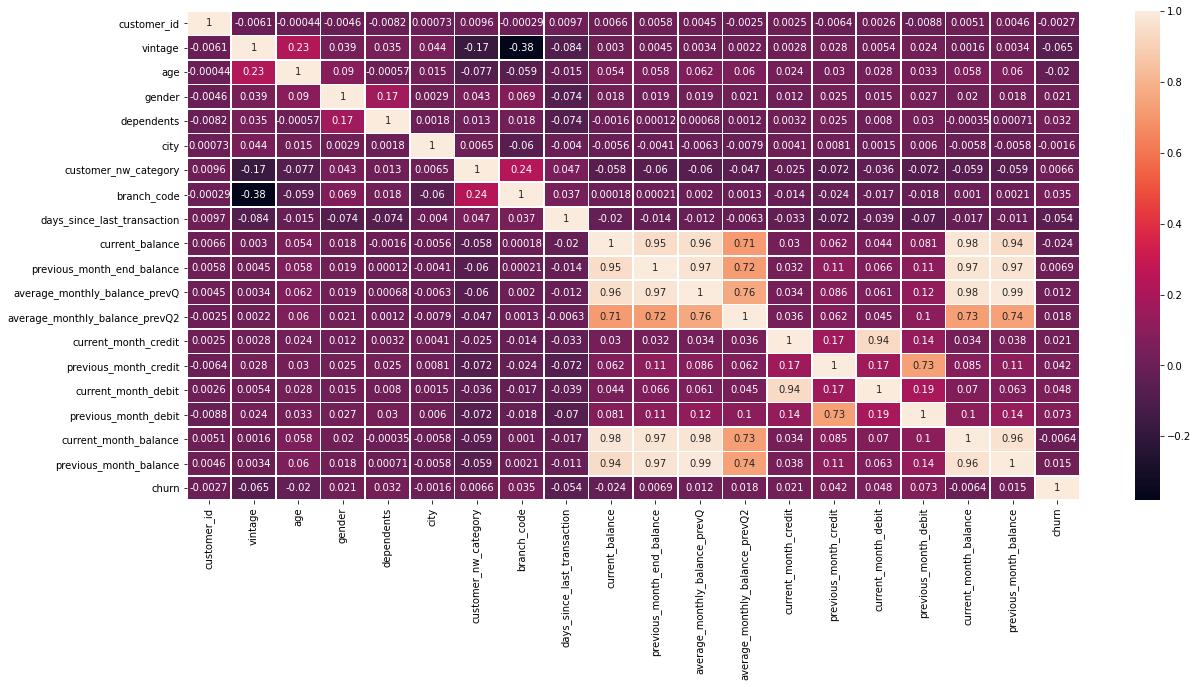

In [19]:
# Since we can observe now, that the dataset is highly imbalanced we'll analyze some parameters before moving to model building

plt.figure(figsize = (20,9))
corrmat = dataset.corr()
sn.heatmap(corrmat,annot = True,linewidths=.7)

In [20]:
corrmat.shape

(20, 20)

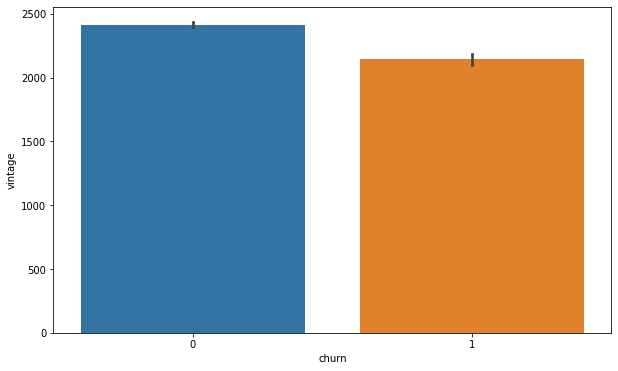

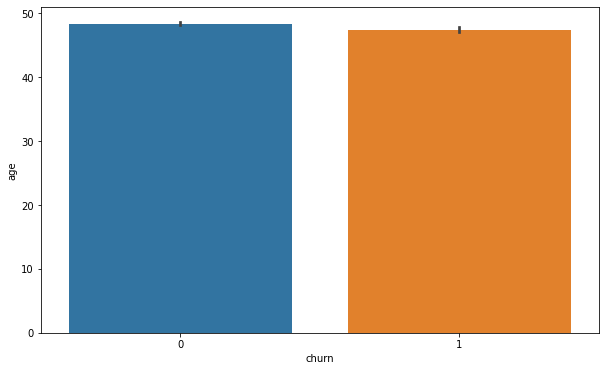

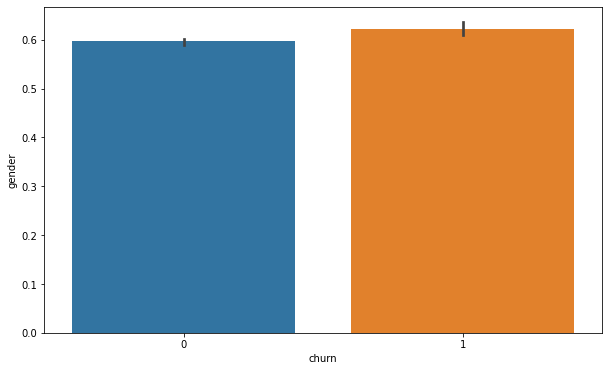

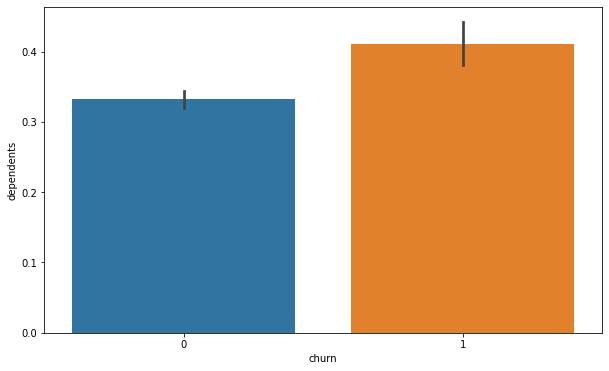

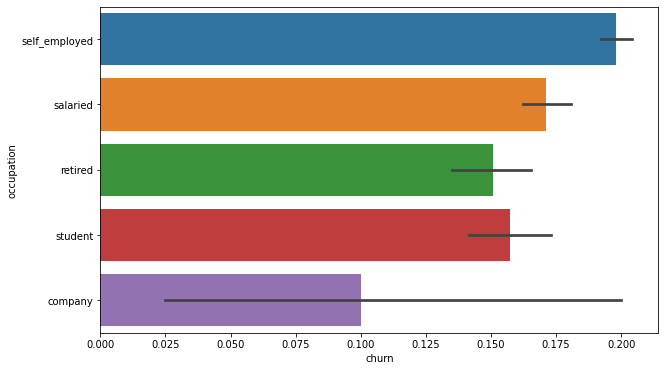

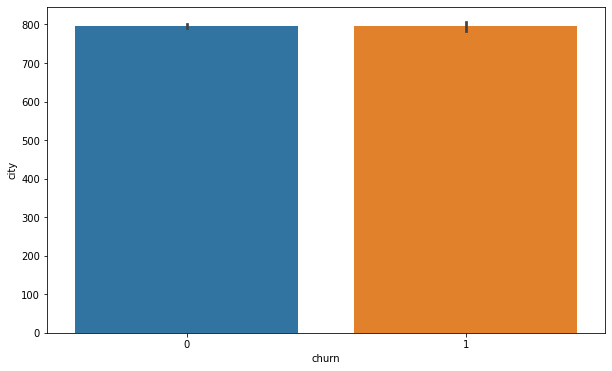

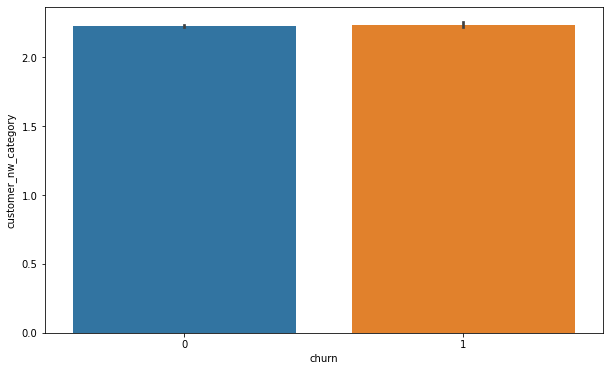

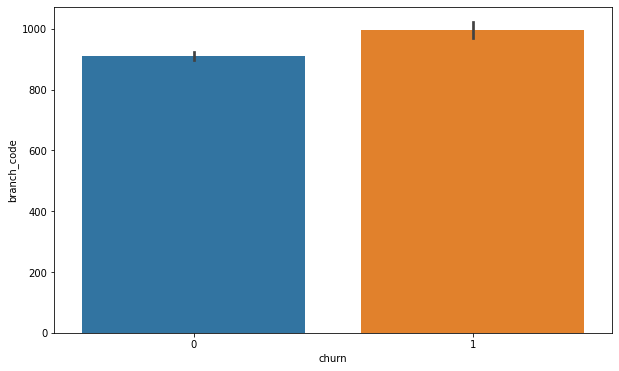

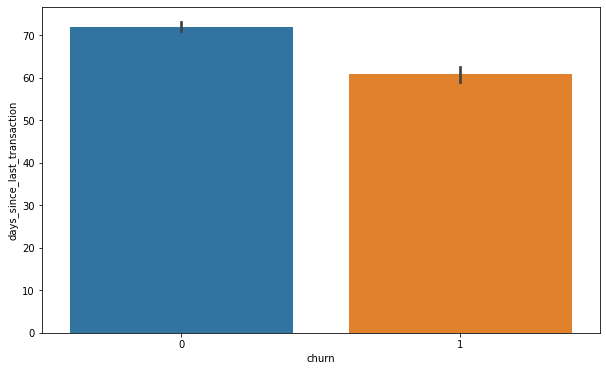

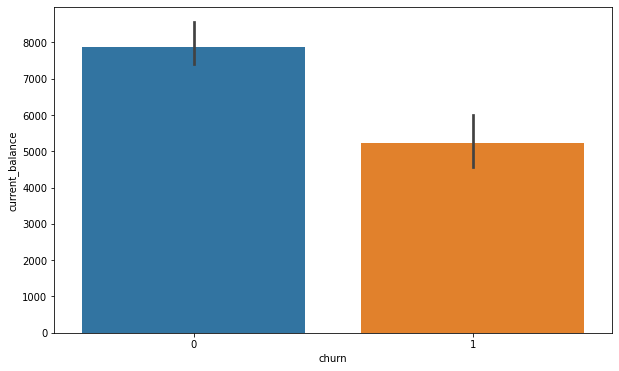

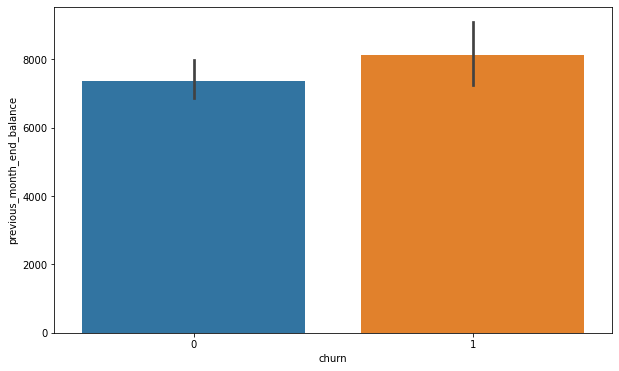

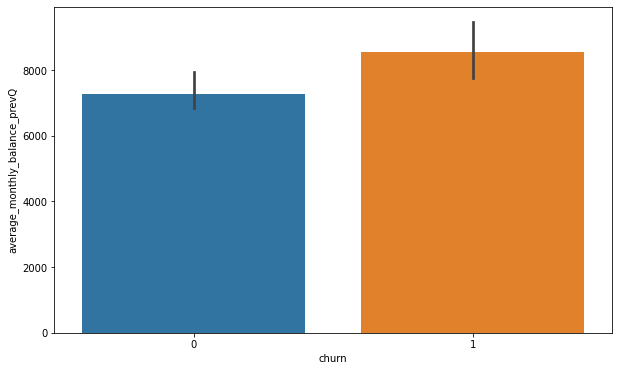

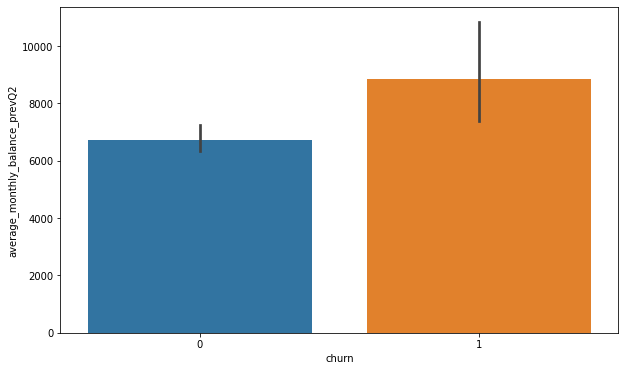

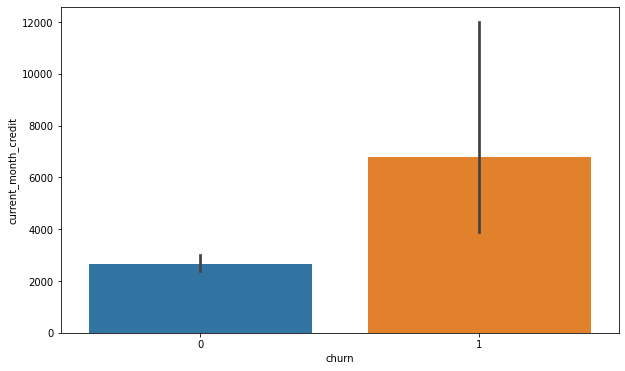

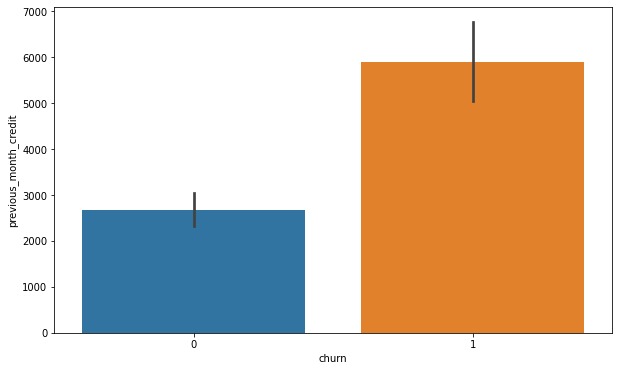

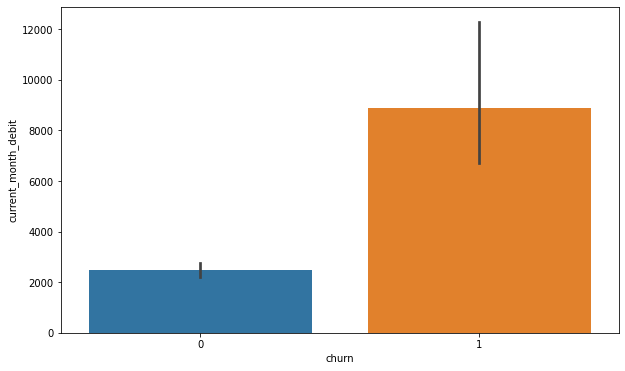

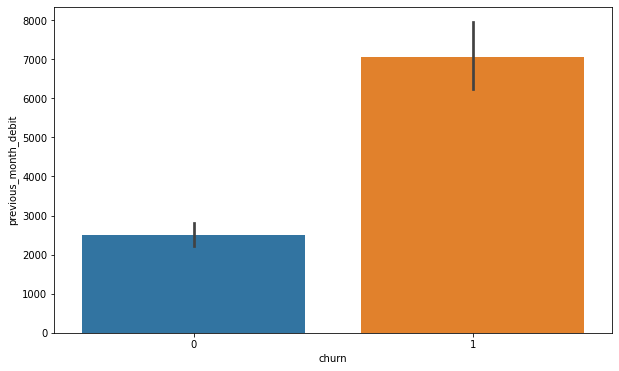

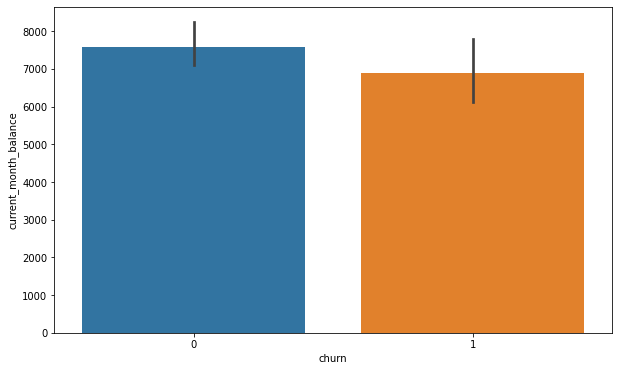

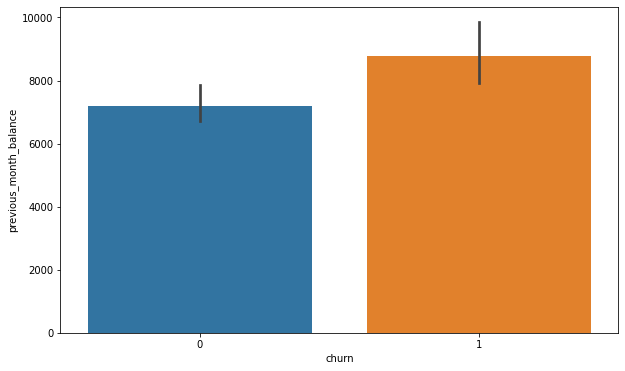

In [21]:
columns_list = list(dataset.columns)
columns_list.remove('customer_id')
columns_list.remove('churn')

for i in columns_list:
  fig = plt.figure(figsize = (10,6))
  sn.barplot(x = 'churn', y = i, data = dataset)

In [22]:
dataset.churn.value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [23]:
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.000000,self_employed,187.000000,2,755,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1,0.000000,self_employed,796.109576,2,3214,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.000000,salaried,146.000000,2,41,69.997814,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,1,0.347236,self_employed,1020.000000,2,582,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.000000,self_employed,1494.000000,3,388,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [24]:
dataset.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
28377,30297,1845,10,0,0.0,student,1020.0,2,1207,70.000000,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,0,0.0,self_employed,1046.0,2,223,14.000000,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,1,0.0,salaried,1096.0,2,588,0.000000,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,1,3.0,self_employed,1219.0,3,274,69.997814,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0
28381,30301,2349,18,1,0.0,student,1232.0,2,474,59.000000,2107.05,2821.34,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1


In [25]:
 dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.000000,self_employed,187.000000,2,755,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1,0.000000,self_employed,796.109576,2,3214,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.000000,salaried,146.000000,2,41,69.997814,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,1,0.347236,self_employed,1020.000000,2,582,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.000000,self_employed,1494.000000,3,388,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [26]:
dataset.drop(dataset.columns[[0,2,3,6,7,8,12,13,15,19]], axis=1,inplace=True)

In [27]:
dataset.head()

,vintage,dependents,occupation,days_since_last_transaction,current_balance,previous_month_end_balance,current_month_credit,current_month_debit,previous_month_debit,current_month_balance,churn
0,3135,0.000000,self_employed,224.000000,1458.71,1458.71,0.20,0.20,0.20,1458.71,0
1,310,0.000000,self_employed,60.000000,5390.37,8704.66,0.56,5486.27,100.56,6496.78,0
2,2356,0.000000,salaried,69.997814,3913.16,5815.29,0.61,6046.73,259.23,5006.28,0
3,478,0.347236,self_employed,147.000000,2291.91,2291.91,0.47,0.47,2143.33,2291.91,1
4,2531,2.000000,self_employed,58.000000,927.72,1401.72,0.33,588.62,1538.06,1157.15,1


## Separating dependant and independant variables

In [28]:
x = dataset.iloc[:,0:10].values
y = dataset.iloc[:,10:].values

In [29]:
x

array([[3135, 0.0, 'self_employed', ..., 0.2, 0.2, 1458.71],
       [310, 0.0, 'self_employed', ..., 5486.27, 100.56, 6496.78],
       [2356, 0.0, 'salaried', ..., 6046.73, 259.23, 5006.28],
       ...,
       [297, 0.0, 'salaried', ..., 168.23, 71.8, 61078.5],
       [2585, 3.0, 'self_employed', ..., 0.2, 0.2, 1625.55],
       [2349, 0.0, 'student', ..., 714.4, 1094.09, 2402.62]], dtype=object)

In [30]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

# OneHot Encoding

**Occupation** column also is categorical and contains five categories viz.
 - self_employed
 - salaried
 - Student
 - retired
 - company

 We make use of OneHot encoding to convert these categorical data to numeric.
- As label encoding will encode the labels with a value betweeen 0 and no of classes - 1. So, if the number of labels is large, it imposes some sort of order in them.

**Ex**, if we make use of label encoding in this column we will have something like this,
 - self_employed - 0
 - salaried - 1
 - Student - 2
 - retired - 3
 - company - 4
 And the model might interpret this as 4>3>2>1>0 which should not be the case, hence we use oneHot Encoding.





In [31]:
ct = ColumnTransformer([("on",OneHotEncoder(),[2])],remainder='passthrough')

In [32]:
x = ct.fit_transform(x)

x

array([[0.0, 0.0, 0.0, ..., 0.2, 0.2, 1458.71],
       [0.0, 0.0, 0.0, ..., 5486.27, 100.56, 6496.78],
       [0.0, 0.0, 1.0, ..., 6046.73, 259.23, 5006.28],
       ...,
       [0.0, 0.0, 1.0, ..., 168.23, 71.8, 61078.5],
       [0.0, 0.0, 0.0, ..., 0.2, 0.2, 1625.55],
       [0.0, 0.0, 0.0, ..., 714.4, 1094.09, 2402.62]], dtype=object)

In [33]:
x = x[:,1:]

In [34]:
print(x.shape)
print(y.shape)

(28382, 13)
(28382, 1)


Standard Scaling the dependent and independent variables

In [35]:
sc = StandardScaler()

In [36]:
x = sc.fit_transform(x)
x

array([[-0.27710798, -0.55610576,  0.78527401, ..., -0.07037759,
        -0.13742664, -0.14256405],
       [-0.27710798, -0.55610576,  0.78527401, ...,  0.03515519,
        -0.13329672, -0.02270474],
       [-0.27710798,  1.79821909, -1.27344084, ...,  0.04593648,
        -0.12676727, -0.0581648 ],
       ...,
       [-0.27710798,  1.79821909, -1.27344084, ..., -0.06714528,
        -0.13448022,  1.27583362],
       [-0.27710798, -0.55610576,  0.78527401, ..., -0.07037759,
        -0.13742664, -0.1385948 ],
       [-0.27710798, -0.55610576, -1.27344084, ..., -0.05663888,
        -0.09241186, -0.12010775]])

## Dividing into train and test sets

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22705, 13)
(5677, 13)
(22705, 1)
(5677, 1)


## Applying relevant models for determining the potential accuracy

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
print(lr.predict(x_test))

[0 0 0 ... 0 0 0]


In [42]:
y_pred = lr.predict(x_test)

In [43]:
print(y_test)

[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [44]:
print(accuracy_score(y_pred,y_test))

0.8176853972168399


In [45]:
skfold = StratifiedKFold(n_splits=3,random_state=0)
model_c = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_c, x, y.ravel(), cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 81.78%


In [46]:
skfold = StratifiedKFold(n_splits=3,random_state=0)
model_c = RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=0,n_jobs=-1)
results_skfold = model_selection.cross_val_score(model_c, x, y.ravel(), cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 84.65%


## We can conclude that the dataset performs well with Random Forest model